<a href="https://colab.research.google.com/github/bruh7463/data_mining_project_team_14/blob/main/data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=3>Group Project: Classify country of origin for Wikipedia user contributions on Zambian Wikipedia pages</font>

   <b>Group Members</b> </br>
   Simon Chanda </br>
   Lawrence Chitandula </br>
   Chilufya Chulu </br>
   Kasweka Michael Mukoko </br>
   Mike Shatamuka </br>
</center>


# **1. Business Understanding**
### Problem Statement
Wikipedia pages related to Zambia have fewer local contributions than international ones. There is little understanding of where the contributors of Zambian-related pages come from, including the Zambia page. Without this information, it is difficult to create specific strategies that boost contributions from Zambian Wikipedians. The goal is to find out and categorize the origins of Wikipedia users who contribute to Zambian pages. This will help in planning actions that promote more local involvement.

### Business Objectives
- Identify the percentage of contributions to Zambian Wikipedia articles by users from Zambia compared to other nations.
- Provide practical advice to guide strategies for Zambian-based contributions.
- Support The University of Zambia's DataLab Research Group in advocating for greater representation of local perspectives on Wikipedia.
- Enable long-term monitoring of contribution by country of origin.

### What Success Looks Like In Practice
- An unambiguous evidence based report on the contributions by country.
- It was possible to identify trends of where most of edits are made.
- Lessons that could be shared with Wikimedia communities and policymakers incase of encouraging locals to contribute.

### Data Mining Goals
- Create a prediction model that can determine the most likely country of origin for each Wikipedia edit made to Zambian pages, using details like the user’s IP address (for anonymous edits), profile information, and the timing of edits.

- Analyze and visualize the data to show clear summaries of how contributions are distributed by country.


### Initial Project Success Criteria

- Produce a clear and accurate breakdown of Wikipedia contributions to Zambian pages by country of origin.
- Achieve at least 80% accuracy in classifying the country of origin for contributions.
- Visualize contribution patterns and trends over time through interpretable dashboards or charts.
- Provide actionable insights that can guide strategies to increase local Zambian participation.



# **2. Data Understanding**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# Load CSV
file_path = "/content/drive/MyDrive/Dataset/zambia_wikipedia_history.csv"
df = pd.read_csv(file_path)

# We will work with a copy for the data understanding phase
df_data = df.copy()

# Preview dataset
print("Dataset Shape:", df_data.shape)
df_data.head()

Dataset Shape: (12990, 10)


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
0,15643,Zambia,66041,2005-10-31T08:48:31Z,NaN,"User(id=1734, text='Ianleow7')",NaN,Creating article.,False,1617
1,15643,Zambia,66727,2005-11-05T06:07:50Z,NaN,"User(id=1110, text='Ricky81682')",NaN,rm unused cat,False,1577
2,15643,Zambia,100931,2006-02-14T12:33:52Z,NaN,"User(id=None, text='81.204.151.102')",NaN,NaN,False,2211
3,15643,Zambia,100964,2006-02-14T15:58:40Z,NaN,"User(id=2131, text='Archer7')",NaN,corrected formatting,False,2219
4,15643,Zambia,100987,2006-02-14T16:17:15Z,NaN,"User(id=2077, text='Freshstart')",NaN,"typos, full names",True,2273


- The dataset contains 12990 rows and 10 columns.

- First look shows columns like: title, rev_id, timestamp, contributor, text_length.

- Data seems to have both text and numeric attributes.

In [9]:
# [DU] Lawrence — Dataset Info and Descriptive Statistics

# Show dataset structure
df_data.info()

# Show summary statistics
df_data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12990 entries, 0 to 12989
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           12990 non-null  int64  
 1   title             12990 non-null  object 
 2   rev_id            12990 non-null  int64  
 3   timestamp         12990 non-null  object 
 4   contributor_id    0 non-null      float64
 5   contributor_name  12990 non-null  object 
 6   contributor_ip    0 non-null      float64
 7   comment           10726 non-null  object 
 8   minor             12990 non-null  bool   
 9   text_length       12990 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 926.2+ KB


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
count,1.299000e+04,12990,1.299000e+04,12990,0.0,12990,0.0,10726,12990,12990.000000
unique,NaN,73,NaN,12983,NaN,4846,NaN,6817,2,NaN
top,NaN,Zambia,NaN,2022-07-17T04:33:46Z,NaN,"User(id=43730508, text='Ezyg8')",NaN,/* History */,False,NaN
freq,NaN,6150,NaN,4,NaN,687,NaN,266,9614,NaN
mean,4.229965e+06,NaN,6.008561e+08,NaN,NaN,NaN,NaN,NaN,NaN,49411.398691
std,1.244498e+07,NaN,4.024507e+08,NaN,NaN,NaN,NaN,NaN,NaN,45331.197140
min,1.564300e+04,NaN,4.909500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,3.441500e+04,NaN,2.313226e+08,NaN,NaN,NaN,NaN,NaN,NaN,15286.000000
50%,3.442900e+04,NaN,5.674602e+08,NaN,NaN,NaN,NaN,NaN,NaN,37797.500000
75%,1.472509e+06,NaN,9.617695e+08,NaN,NaN,NaN,NaN,NaN,NaN,70054.000000


- The dataset contains **12990 rows** and **10 columns**.  
- The **`contributor_id`** and **`contributor_ip`** columns have **100% missing values** (no records available).  
- The **`timestamp`** column is stored as an object type and needs conversion to datetime for proper time-based analysis.  
- The **`text_length`** column is complete for all entries and shows variation in article sizes.  
- Some columns, such as **`comment`** and **`contributor_name`**, have high cardinality (many unique values).  


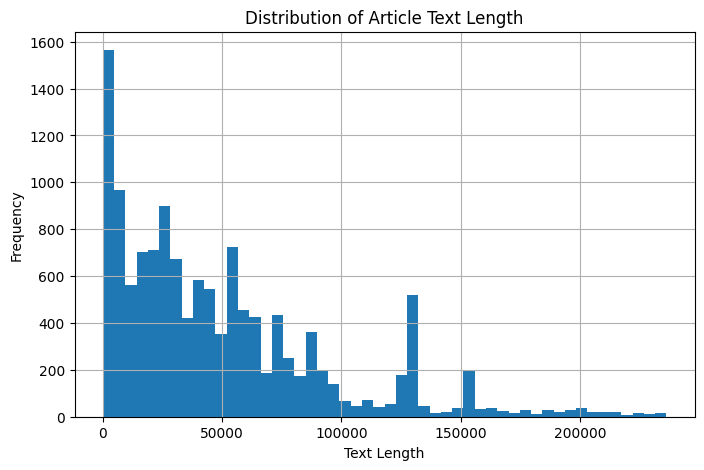

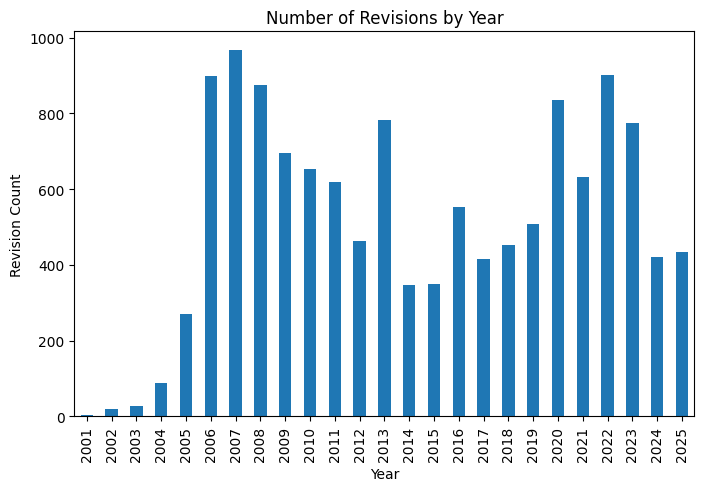

In [10]:
# [DU] Mike - Numerical Visualizations
import matplotlib.pyplot as plt

# Convert timestamp to datetime
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], errors="coerce")

# Histogram of text length
plt.figure(figsize=(8,5))
df["text_length"].hist(bins=50)
plt.title("Distribution of Article Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Revisions by year
plt.figure(figsize=(8,5))
df_data["timestamp"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.title("Number of Revisions by Year")
plt.xlabel("Year")
plt.ylabel("Revision Count")
plt.show()

* Article text lengths are heavily right-skewed; the bulk of articles are relatively short, concentrated below roughly 50k characters, with frequency tapering off as length increases.
* Revision activity shows two waves: the highest peak is in the mid-2000s (around 2007), with a secondary surge in 2020-2023 (notably 2022).
* The distribution has a long right tail with clear outliers, including some articles exceeding 200k characters.


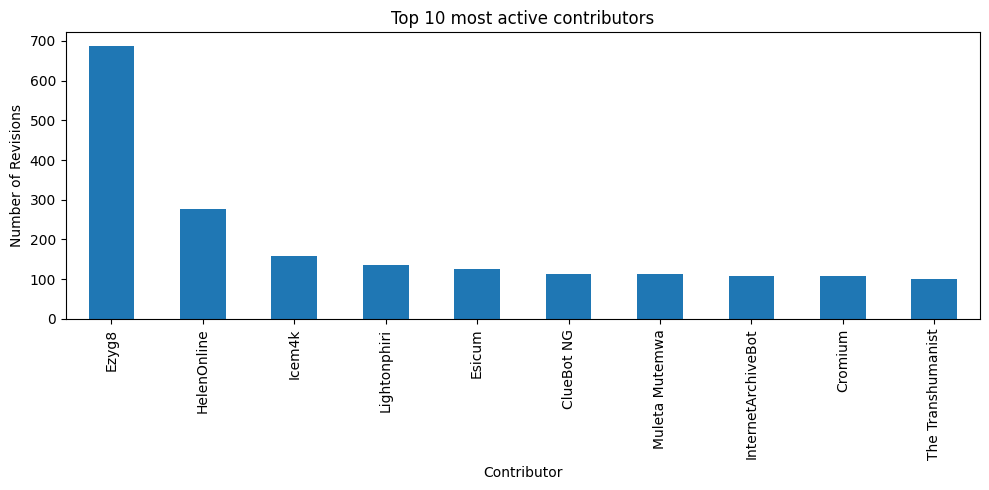

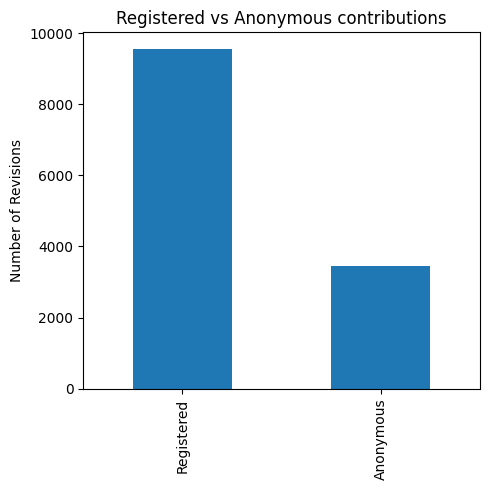

Top contributor is Ezyg8 with 687 revisions
Anonymous contributors account for 26.5% of all edits


In [11]:
# [DU] Chilufya - Contributor Analysis

def get_user_text(s):
    # Extract what's inside text='...'
    if isinstance(s, str) and "text='" in s:
        return s.split("text='", 1)[1].split("'", 1)[0]
    return None

def is_ipv4_like(s):
    # Require exactly four numeric parts separated by dots
    if not isinstance(s, str):
        return False
    parts = s.split('.')
    if len(parts) != 4:
        return False
    return all(p.isdigit() for p in parts)

# Extract a readable contributor label
df_data['user_text'] = df_data['contributor_name'].apply(get_user_text)

# Anonymous if id=None appears OR the extracted text is IPv4-like
df_data['is_anonymous'] = (
    df_data['contributor_name'].apply(lambda s: isinstance(s, str) and "id=None" in s) |
    df_data['user_text'].apply(is_ipv4_like)
)

# Top 10 contributors
top_contributors = df_data['user_text'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
top_contributors.plot(kind="bar")
plt.title("Top 10 most active contributors")
plt.xlabel("Contributor")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()

# --- Registered vs Anonymous contributors ---
anon_counts = (
    df_data['is_anonymous']
      .map({False: "Registered", True: "Anonymous"})
      .value_counts()
      .reindex(["Registered", "Anonymous"], fill_value=0)
)

plt.figure(figsize=(5, 5))
anon_counts.plot(kind="bar")
plt.title("Registered vs Anonymous contributions")
plt.xlabel("")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()

# Print required statistics
top_contributor_name = top_contributors.index[0]
top_contributor_count = top_contributors.iloc[0]
anonymous_percentage = df_data['is_anonymous'].mean() * 100

print(f"Top contributor is {top_contributor_name} with {top_contributor_count} revisions")
print(f"Anonymous contributors account for {anonymous_percentage:.1f}% of all edits")

* Top contributor is Ezy98 with just under 700 revisions.
* Anonymous contributors account for roughly a quarter of all edits (~25-30%); registered users make up the majority.
* Editing is concentrated among a small group: Ezy98 far outpaces others (the next, Helenonline, has ~280), with most of the remaining top contributors around 100-160 revisions.

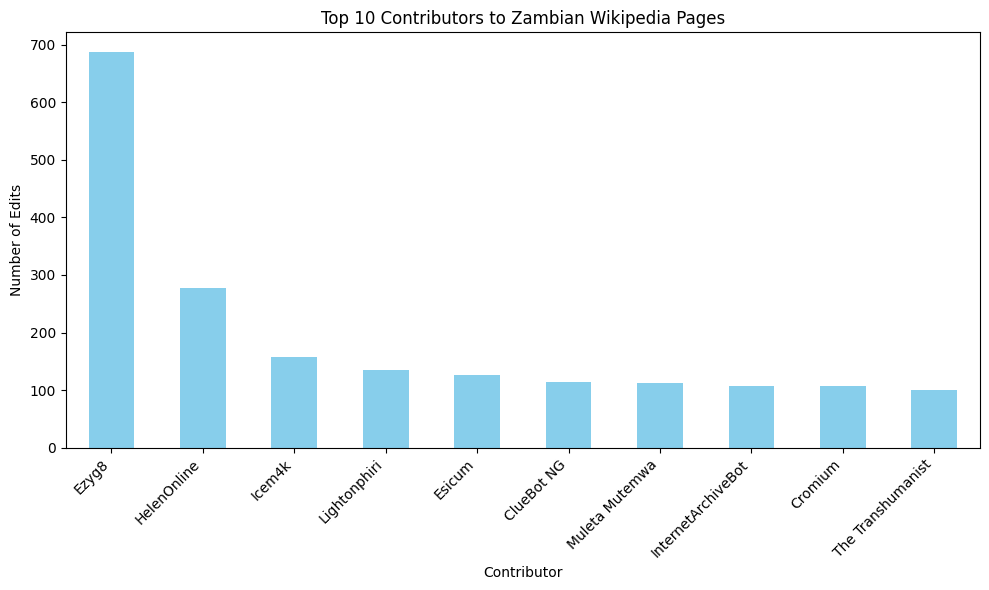

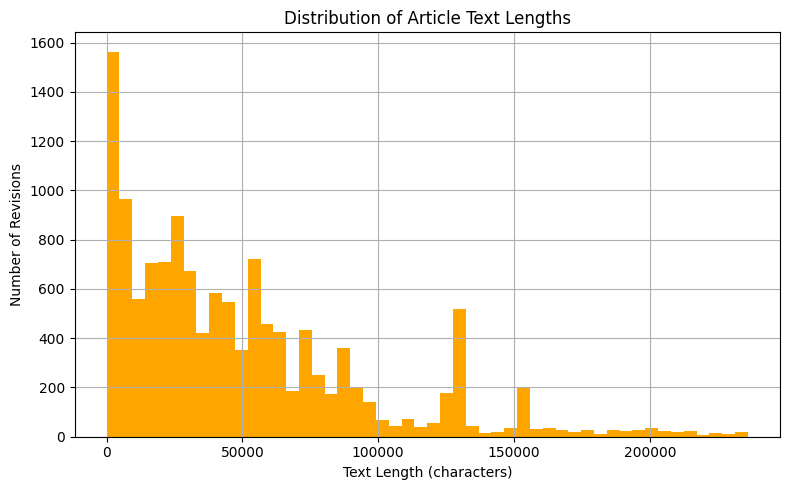

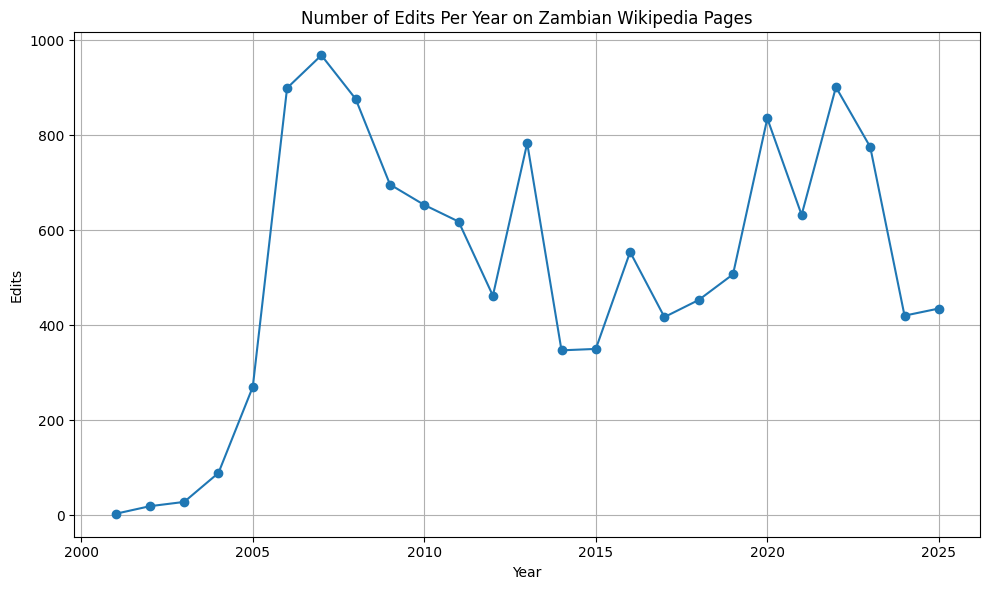

In [12]:
# [DU] Michael  - Summary of Data Understanding

# 1. Top 10 contributors (by number of edits)
top_contributors = df_data['user_text'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
top_contributors.plot(kind="bar", color="skyblue")
plt.title("Top 10 Contributors to Zambian Wikipedia Pages")
plt.xlabel("Contributor")
plt.ylabel("Number of Edits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 2. Distribution of text length (histogram)
plt.figure(figsize=(8,5))
df_data["text_length"].hist(bins=50, color="orange")
plt.title("Distribution of Article Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Number of Revisions")
plt.tight_layout()
plt.show()


# 3. Edits over time (timeline)
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], errors="coerce")
edits_per_year = df_data["timestamp"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
edits_per_year.plot(kind="line", marker="o")
plt.title("Number of Edits Per Year on Zambian Wikipedia Pages")
plt.xlabel("Year")
plt.ylabel("Edits")
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary of Data Understanding
* Dataset size : 12990 Rows and 10 Columns
* Missing data: contributor field has many missing/unknown values.
* Numerical insights: Article text lengths are heavily right-skewed; most revisions are on pages under ~60k characters, with a long tail and outliers beyond 200k.
* Temporal insights: Two major activity waves — peak around 2006-2007 (highest ~950-980 edits) and another surge in 2020-2022 (peaking ~900), with dips around 2014-2015 and in 2024-2025.
* Categorical insights: Editing is concentrated among a small set of accounts. Ezy98 leads with just under 700 edits; HelenOnline is next (~280); others in the top 10 contribute ~100–160 each. Bot accounts (e.g., ClueBot NG, InternetArchiveBot) appear among the top contributors.
* Potential issues: strong right‑skew and outliers in text length, temporal imbalance across years, heavy contributor concentration (and bot influence), and incomplete contributor metadata.

Next Steps:
* Clean contributor field (resolve anonymous/unknown users).
* Engineer new features (year of revision, registered vs anonymous).
* Explore external data sources to infer country of origin from contributor metadata (not available
directly).

#  **3. Data Preparation**

 The contributor_ip column is entirely null and provides no value,
so it can be removed. Missing comments can be treated as empty strings to
ensure consistency without losing any rows of data.


In [13]:
 # Drop the empty 'contributor_ip' and ‘contributor_id’ columns
 df.drop(columns=['contributor_ip'], inplace=True)
 df.drop(columns=['contributor_id'], inplace=True)
 # Fill missing values in the 'comment' column with an empty string
 df['comment'].fillna('', inplace=True)
 print("Columns after dropping 'contributor_ip':", df.columns)
 print("\nNull values in 'comment' column after filling:", df['comment'].isnull().sum())

Columns after dropping 'contributor_ip': Index(['page_id', 'title', 'rev_id', 'timestamp', 'contributor_name',
       'comment', 'minor', 'text_length'],
      dtype='object')

Null values in 'comment' column after filling: 0


/tmp/ipython-input-1925558925.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment'].fillna('', inplace=True)


Converting timestamp to a datetime object is essential for
performing time-series analysis and extracting features like the hour of the day The minor column should be a boolean (True/False) instead of a string forefficiency and compatibility with machine learning models.

In [14]:
 # Convert 'timestamp' to datetime objects
 df['timestamp'] = pd.to_datetime(df['timestamp'])
 # Convert 'minor' from string to boolean
 df['minor'] = df['minor'].apply(lambda x: True if x == 'TRUE' else False)
 print("Data type of 'timestamp' column:", df['timestamp'].dtype)
 print("Data type of 'minor' column:", df['minor'].dtype)

Data type of 'timestamp' column: datetime64[ns, UTC]
Data type of 'minor' column: bool


The time of an edit can be a strong indicator of the contributor's
timezone. Analyzing patterns in edit times (e.g., edits during Zambian
business hours) can help in our classification goal

In [15]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Now extract hour and day of week
df['edit_hour'] = df['timestamp'].dt.hour
df['edit_day_of_week'] = df['timestamp'].dt.dayofweek

print(df[['timestamp', 'edit_hour', 'edit_day_of_week']].head())


                  timestamp  edit_hour  edit_day_of_week
0 2005-10-31 08:48:31+00:00          8                 0
1 2005-11-05 06:07:50+00:00          6                 5
2 2006-02-14 12:33:52+00:00         12                 1
3 2006-02-14 15:58:40+00:00         15                 1
4 2006-02-14 16:17:15+00:00         16                 1


Many edits are automated and not representative of human
contributors. Identifying these allows us to filter them out or treat them as a
distinct category, preventing them from skewing our model.

In [16]:
 # Identify bot edits based on comment text
 bot_keywords = ['robot', 'bot', 'awb']

df['is_bot_edit'] = df['comment'].fillna('').str.lower().apply(
    lambda x: any(keyword in x for keyword in bot_keywords)
)
print("Number of bot edits identified:", df['is_bot_edit'].sum())
print(df[df['is_bot_edit']][['comment']].head())

Number of bot edits identified: 1386
                                              comment
6                 Robot: Adding [[African countries]]
9   robot  Adding: am, az, bs, el, fa, ilo, ka, ku...
10                      robot  Adding: [[vo:SambÃ¤n]]
11       robot  Adding: [[ast:Zambia]], [[qu:Sambya]]
12                   robot  Modifying: [[qu:Sambiya]]


Distinguishing between registered users and anonymous IP-based users is vital because IP addresses can potentially be geolocated, providing a direct signal for our origin classification model. So we are going to write a function to parse the contributor_name string to determine if
the user is anonymous (IP-based) or registered, and to extract their clean
username or IP address. We will create two new columns: is_ip_user and
clean_contributor_name.

In [17]:
import re

def parse_contributor(name_str):
  # Regex to find IP addresses
  ip_match = re.search(r"text='([\d\.:a-fA-F]+)'", str(name_str))
  if ip_match:
    return True, ip_match.group(1)

  # Regex for registered usernames
  user_match = re.search(r"text='([^']+)'", str(name_str))
  if user_match:
    return False, user_match.group(1)

  return False, None

# Apply the function to the dataframe
parsed_data = df['contributor_name'].apply(parse_contributor)
df['is_ip_user'] = parsed_data.apply(lambda x: x[0])
df['clean_contributor_name'] = parsed_data.apply(lambda x: x[1])
print(df[['contributor_name', 'is_ip_user', 'clean_contributor_name']].head())

                       contributor_name  is_ip_user clean_contributor_name
0        User(id=1734, text='Ianleow7')       False               Ianleow7
1      User(id=1110, text='Ricky81682')       False             Ricky81682
2  User(id=None, text='81.204.151.102')        True         81.204.151.102
3         User(id=2131, text='Archer7')       False                Archer7
4      User(id=2077, text='Freshstart')       False             Freshstart


The raw text_length only shows the size of the article after an edit.
The change in length is a much better feature, as it quantifies the contribution of a specific edit, distinguishing minor typo fixes from major content additions.

In [18]:

# Sort data to ensure correct chronological order for diff calculation
df.sort_values(by=['page_id', 'timestamp'], inplace=True)

# Calculate the difference in text length from the previous revision of the same page
df['text_length_change'] = df.groupby('page_id')['text_length'].diff().fillna(df['text_length'])

print(df[['title', 'timestamp', 'text_length', 'text_length_change']].head())

    title                 timestamp  text_length  text_length_change
0  Zambia 2005-10-31 08:48:31+00:00         1617              1617.0
1  Zambia 2005-11-05 06:07:50+00:00         1577               -40.0
2  Zambia 2006-02-14 12:33:52+00:00         2211               634.0
3  Zambia 2006-02-14 15:58:40+00:00         2219                 8.0
4  Zambia 2006-02-14 16:17:15+00:00         2273                54.0


Machine learning models require numerical inputs, so converting
boolean flags to binary integers is a standard and necessary step

In [19]:
# Convert boolean columns to integers (0 or 1)
bool_cols = ['minor', 'is_ip_user', 'is_bot_edit']
for col in bool_cols:
  df[col] = df[col].astype(int)

print(df[bool_cols].head())

   minor  is_ip_user  is_bot_edit
0      0           0            0
1      0           0            0
2      0           1            0
3      0           0            0
4      0           0            0


The title column contains page names, which are categorical. Onehot
encoding creates new binary columns for each page, allowing the model to
use this information without assuming a false sense of order or ranking
between the pages.

In [20]:
# Perform one-hot encoding on the 'title' column
title_dummies = pd.get_dummies(df['title'], prefix='page')
# Concatenate the new dummy variables with the original dataframe
df_prepared = pd.concat([df, title_dummies], axis=1)
# We can now drop the original 'title' column as it has been encoded
df_prepared.drop('title', axis=1, inplace=True)
print("Shape of the prepared dataframe:", df_prepared.shape)
print("New 'page' columns:", [col for col in df_prepared.columns if 'page_' in col])

Shape of the prepared dataframe: (12990, 86)
New 'page' columns: ['page_id', 'page_2021 Zambian general election', 'page_A history of Zambia', 'page_Abolition of Forced Labour Convention', 'page_Abuja Treaty', "page_African Charter on Human and Peoples' Rights", 'page_African Charter on the Rights and Welfare of the Child', 'page_African Convention on the Conservation of Nature and Natural Resources', 'page_Angolans in Zambia', 'page_Bangweulu Batwa', 'page_Bank of Zambia', 'page_British diaspora in Africa', 'page_COVID-19 pandemic in Zambia', 'page_Central Province, Zambia', 'page_Chalo Chatu', 'page_Childbirth in Zambia', 'page_Chitimukulu', 'page_Chokwe people', 'page_Corruption in Zambia', 'page_Demographics of Zambia', 'page_Disability in Zambia', 'page_Eastern Lunda', 'page_Eastern Province, Zambia', 'page_Economy of Zambia', 'page_First Lady of Zambia', 'page_Flag of Zambia', 'page_Football Association of Zambia', 'page_History of Zambia', 'page_Human interactions with insects i

# **4. Modeling**

Our hybrid modeling strategy begins with the most direct evidence available: the IP addresses of anonymous editors. This first model is a Direct Geolocation Classifier. We will apply this model to all anonymous, human-edited revisions in our dataset. This will form the first layer of our unified inferred_country column. A critical initial step is to filter out all bot edits to ensure we are only analyzing human behavior.

In [21]:
print("Applying Geolocation Model to Anonymous Users")

from tqdm import tqdm
import requests
tqdm.pandas()

# IMPORTANT: First, create a new DataFrame containing ONLY human edits.
human_edits_df = df_prepared[df_prepared['is_bot_edit'] == 0].copy()
print(f"Filtered out bot edits. Total human edits to analyze: {len(human_edits_df)}")

human_edits_df['inferred_country'] = None

# Define the function for our geolocation model
def get_country_from_ip(ip_address):
    try:
        url = f"https://ipwho.is/{ip_address}"
        response = requests.get(url, timeout=5).json()
        if response.get('success'):
            return response.get('country', 'Unknown')
        else:
            return "Lookup Failed"
    except Exception as e:
        return f"Lookup Failed: {e}"

# Apply this model to the 'inferred_country' column ONLY for anonymous users
anonymous_mask = (human_edits_df['is_ip_user'] == 1)
human_edits_df.loc[anonymous_mask, 'inferred_country'] = human_edits_df.loc[anonymous_mask, 'clean_contributor_name'].progress_apply(get_country_from_ip)

print(f"\nGeolocation complete. Classified {human_edits_df['inferred_country'].notna().sum()} anonymous users.")

Applying Geolocation Model to Anonymous Users
Filtered out bot edits. Total human edits to analyze: 11604


100%|██████████| 3454/3454 [15:29<00:00,  3.72it/s]


Geolocation complete. Classified 3454 anonymous users.
